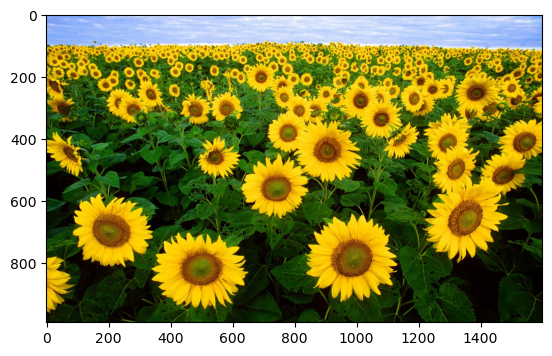

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("C:\\Users\\ishas\\Downloads\\cv pracs\\flower.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
pixel_vals = img.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

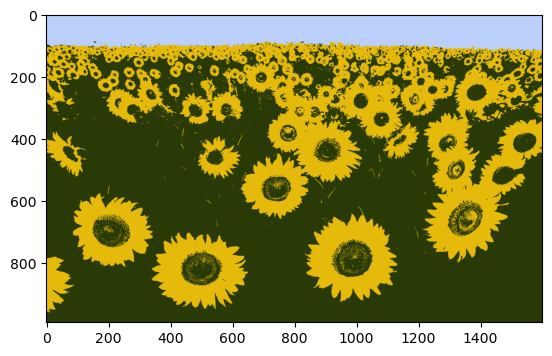

In [5]:
criteria = (cv2.TermCriteria_EPS + cv2.TermCriteria_MAX_ITER, 100,0.85)
k=3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_data = segmented_data.reshape((img.shape))
plt.imshow(segmented_data)

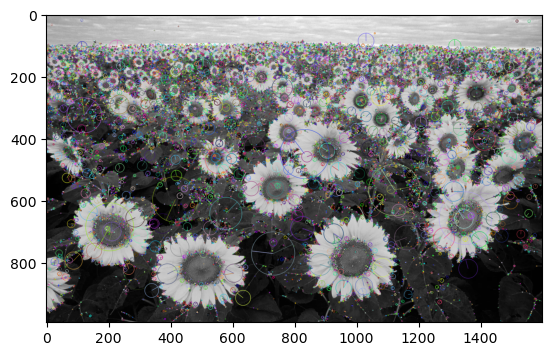

In [11]:
#EXPT 6
img = cv2.imread("C:\\Users\\ishas\\Downloads\\cv pracs\\flower.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img = cv2.drawKeypoints(gray , kp , img , flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#cv2.imwrite("keypoints" , img)
plt.imshow(img)
plt.show()

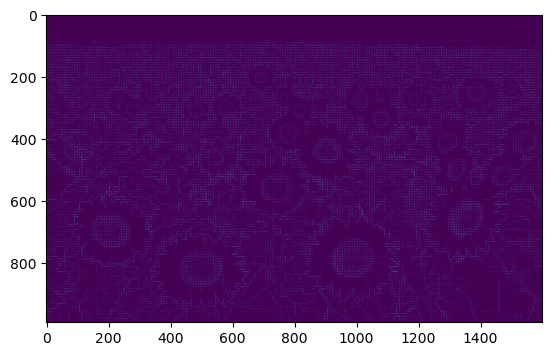

In [14]:
from skimage import feature
hog_features, hog_image = feature.hog(gray, orientations=9, pixels_per_cell=(8, 8),
                                      cells_per_block=(2, 2), block_norm='L2-Hys',
                                      visualize=True, transform_sqrt=True)
hog_image_rescaled = (hog_image - hog_image.min()) / (hog_image.max() - hog_image.min()) * 255
hog_image_rescaled = hog_image_rescaled.astype("uint8")
plt.imshow(hog_image_rescaled)

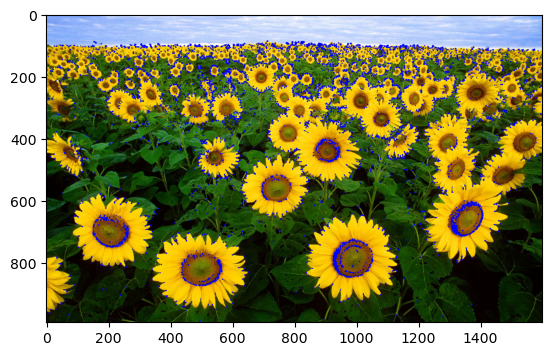

In [17]:
#EXPT5C
img = cv2.imread("C:\\Users\\ishas\\Downloads\\cv pracs\\flower.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img)

In [20]:
help(cv2.GaussianBlur)

Help on built-in function GaussianBlur:

GaussianBlur(...)
    GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
    .   @brief Blurs an image using a Gaussian filter.
    .   
    .   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
    .   supported.
    .   
    .   @param src input image; the image can have any number of channels, which are processed
    .   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
    .   positive and odd. Or, they can be zero's and then they are computed from sigma.
    .   @param sigmaX Gaussian kernel standard deviation in X direction.
    .   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
    .   equal to sigmaX, if both sigmas are z

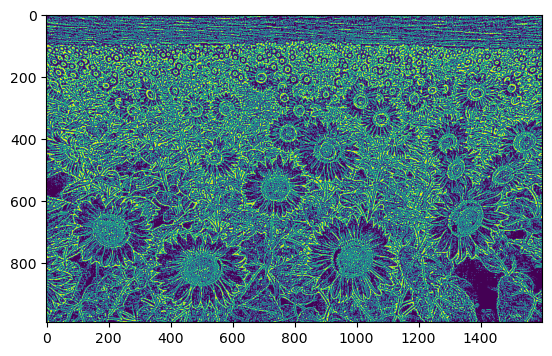

In [24]:
#EXPT5B
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
lowsigma = cv2.GaussianBlur(gray,(3,3),0)
highsigma = cv2.GaussianBlur(gray,(7,7),0)
dog = lowsigma - highsigma
plt.imshow(dog)

In [4]:
#EXPT5A
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("C:\\Users\\ishas\\Downloads\\cv pracs\\maze.jpg")

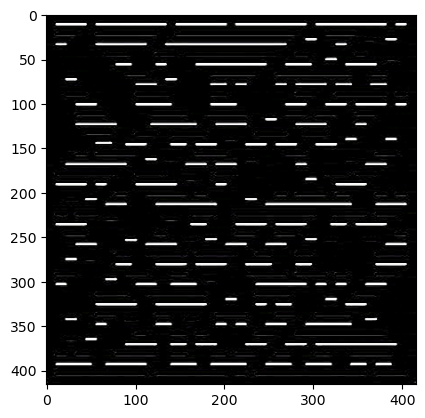

In [5]:
sobel_h = cv2.Sobel(img , ddepth = -1 , dx=0,dy=1, ksize=3)
plt.imshow(sobel_h)

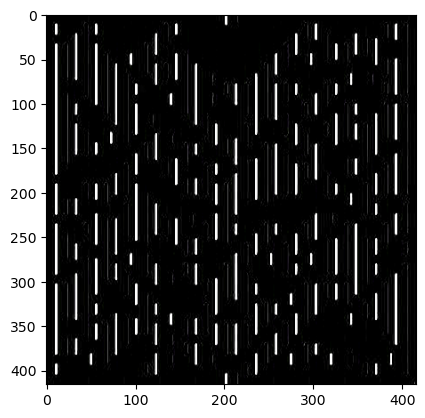

In [6]:
sobel_v = cv2.Sobel(img , ddepth = -1 , dx=1,dy=0, ksize=3)
plt.imshow(sobel_v)

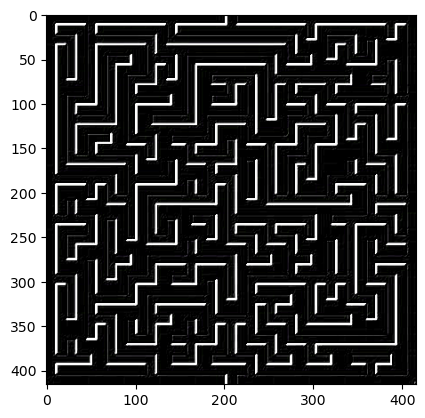

In [10]:
s1 = np.float32([[-1,-2,-1],[0,0,0],[1,2,1]])
s2 = np.float32([[-1,0,1],[-2,0,2],[-1,0,1]])
s3 = s1+s2
sobel = cv2.filter2D(src=img , ddepth=-1 , kernel = s3)
plt.imshow(sobel)

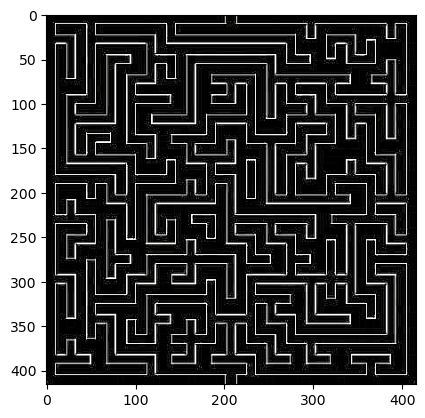

In [11]:
laplacian_image = cv2.Laplacian(img , ksize=3,ddepth=-1)
plt.imshow(laplacian_image)

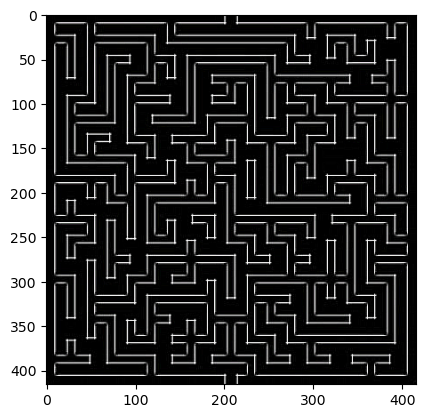

In [12]:
gaussian_image = cv2.GaussianBlur(img , ksize=(3,3) , sigmaX=5 , sigmaY=5)
log_image = cv2.Laplacian(gaussian_image , ddepth=-1 , ksize=3)
plt.imshow(log_image)

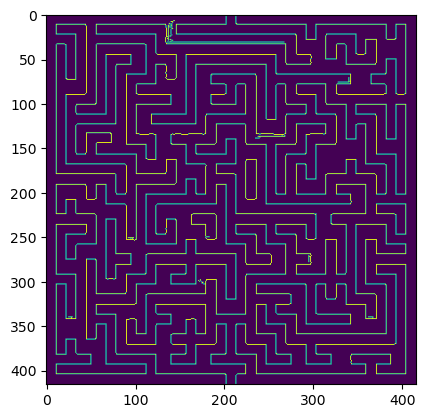

In [14]:
canny_image = cv2.Canny(img , 0 ,255)
plt.imshow(canny_image)

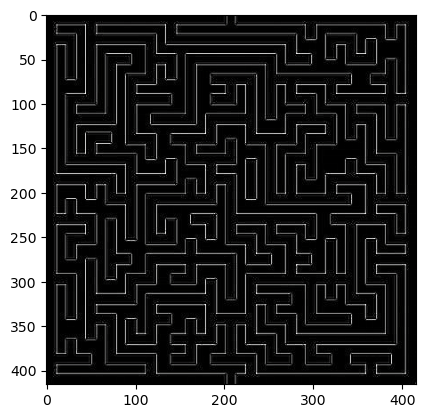

In [16]:
s4 = np.float32([[0,-1,0],[-1,4,-1],[0,-1,0]])
img1 = cv2.filter2D(src=img , ddepth=-1 , kernel = s4)
plt.imshow(img1)

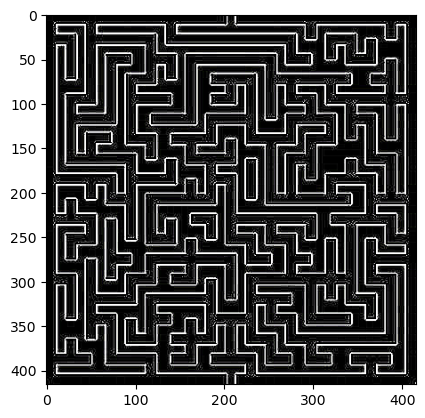

In [19]:
s5 = np.float32([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
img2 = cv2.filter2D(src=img, ddepth=-1 , kernel = s5)
plt.imshow(img2)

In [29]:
#EXPT4
def manual_convolution(image,mask):
    height,width = image.shape
    padded_image = np.pad(image , ((1,1),(1,1)) , mode = 'constant')
    output_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            output_image[i,j] = np.clip(np.sum(padded_image[i:i+3,j:j+3]*mask),0,255)

    return output_image.astype(np.uint8)
    

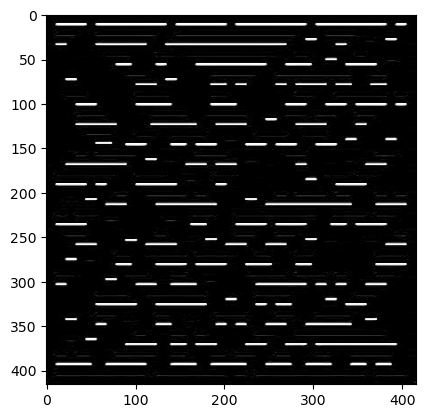

In [30]:
prewitt_mask_vertical = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_mask_horizontal = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
prewitt_mask_combined = np.add(prewitt_mask_horizontal,prewitt_mask_vertical)
img = cv2.imread("C:\\Users\\ishas\\Downloads\\cv pracs\\maze.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
prewitt_convolved_horizontal = manual_convolution(img,prewitt_mask_horizontal)
plt.imshow(cv2.cvtColor(prewitt_convolved_horizontal,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
#EXPT3
import cv2
import numpy as  np
img = cv2.imread("C:\\Users\\ishas\\Downloads\\flower.jpg")
cv2.imshow("image",img)
noise = np.random.normal(0,20,img.shape).astype(np.uint8)
noisy_img = cv2.add(img,noise)
cv2.imshow("noisy image",noisy_img)
kernel=np.ones((3,3),np.float64)/9.0
denoised_img = cv2.filter2D(noisy_img,-1,kernel)
cv2.imshow("denoised image",denoised_img)
Gaussian = cv2.GaussianBlur(noisy_img,(7,7),0)
cv2.imshow("blurred image",Gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:

import cv2
import numpy as np
img = cv2.imread("C:\\Users\\ishas\\Downloads\\flower.jpg")
cv2.imshow("image",img)
noisy_img = img.copy()
for i in range (noisy_img.shape[0]):
    for j in range (noisy_img.shape[1]):
        if np.random.random() < 0.05:
            noisy_img[i,j] = 0
        elif np.random.random() < 0.05:
            noisy_img[i,j] = 255
cv2.imshow("noisy image",noisy_img)
median_filter = np.ones((3, 3), np.uint8)
denoised_image = np.zeros_like(noisy_img)
for i in range(1, noisy_img.shape[0] - 1):
    for j in range(1, noisy_img.shape[1] - 1):
        window = noisy_img[i - 1:i + 2, j - 1:j + 2]
        denoised_image[i, j] = np.median(window)
cv2.imshow("image",denoised_image)
Median = cv2.medianBlur(noisy_img,5)
cv2.imshow("blurred image",Median)
cv2.waitKey(0)
cv2.destroyAllWindows()
    